# House Prices: Advanced Regression Techniques (Kaggle)

### Objetivo: Prever o preço final de cada casa

<i> Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data </i>

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

In [2]:
# Lendo o arquivo de treinamento e teste
trainSet = pd.read_csv('train.csv')
testSet = pd.read_csv('test.csv')

# Análise de dados exploratória

In [3]:
# Dimensão do DataFrame (1460 registros e 81 variáveis)
trainSet.shape

(1460, 81)

In [4]:
trainSet.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Verificando as variáveis que possuem a maior correlação com o target <i> (SalePrice) </i>

In [5]:
# Correlação entre as variáveis e o target
corr = trainSet.corr()
corr.sort_values(['SalePrice'], ascending=False, axis=0, inplace=True)
corr[['SalePrice']].head(11)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [6]:
trainSet[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt']].describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808
std,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000
25%,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000
50%,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000
75%,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000


#### OverallQual: Classifica o material geral e o acabamento da casa (10 - Very Excellent ... 5 - Average ... 1 - Very Poor)

À medida que o "OverallQual" aumenta, o preço da casa aumenta também. Isso indica uma correlação direta e positiva entre essas duas variáveis, e o "OverallQual" parece ser um bom preditor do "SalePrice"

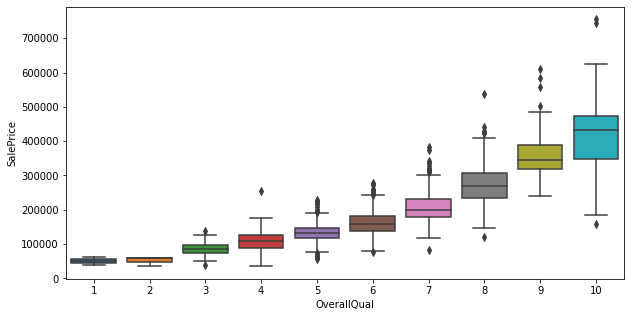

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(x="OverallQual", y="SalePrice", data=trainSet)

#### GrLivArea: Área útil acima do nível do solo 

À medida que o "GrLivArea" aumenta, o preço da casa aumenta também.

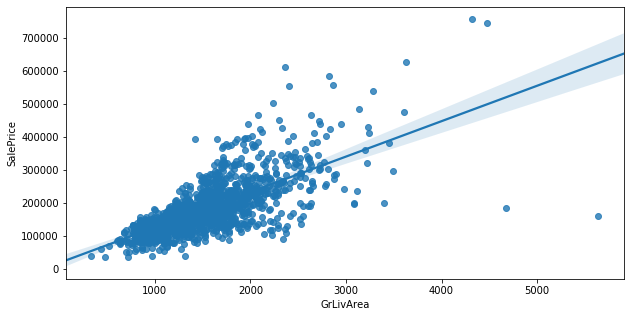

In [8]:
plt.figure(figsize=(10,5))
sns.regplot(x="GrLivArea", y="SalePrice", data=trainSet)

In [9]:
trainSet[["GrLivArea"]].describe()

,GrLivArea
count,1460.000000
mean,1515.463699
std,525.480383
min,334.000000
25%,1129.500000
50%,1464.000000
75%,1776.750000
max,5642.000000


#### GarageCars: Tamanho da garagem em capacidade do carro 
#### GarageArea: Tamanho da garagem

No 3º gráfico é possivel acompanhar como o "GarageCars" e o "GarageArea" se relacionam com o "SalePrice", basicamente casas que possuem uma garagem para 4 carros não interferem tanto no preço final da casa. Essa correlação com o preço só é "forte" até o tamanho 3. Além disso, a correlação entre essas duas váriaveis é bem alta (0.882475)

In [10]:
trainSet[["GarageArea", "GarageCars"]].corr()

,GarageArea,GarageCars
GarageArea,1.000000,0.882475
GarageCars,0.882475,1.000000


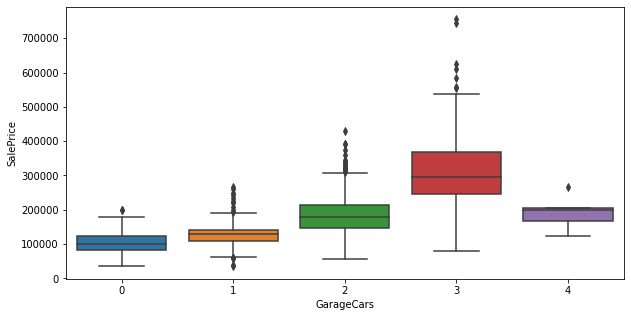

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x="GarageCars", y="SalePrice", data=trainSet)

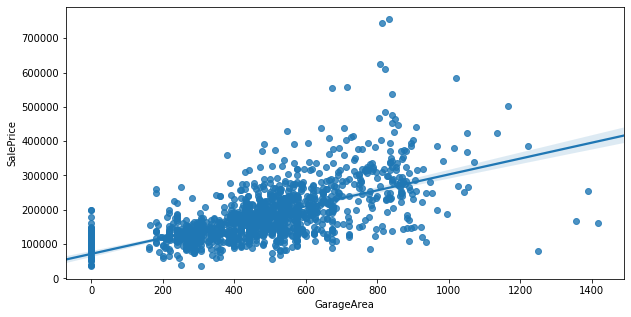

In [12]:
plt.figure(figsize=(10,5))
sns.regplot(x="GarageArea", y="SalePrice", data=trainSet)

In [13]:
trainSet[["GarageArea"]].describe()

,GarageArea
count,1460.000000
mean,472.980137
std,213.804841
min,0.000000
25%,334.500000
50%,480.000000
75%,576.000000
max,1418.000000


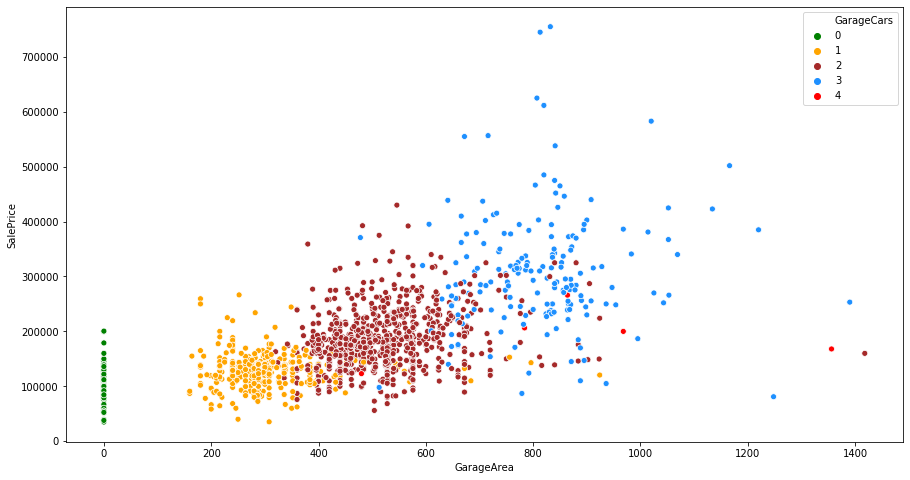

In [14]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="GarageArea", y="SalePrice", hue="GarageCars",data=trainSet,palette=['green','orange','brown','dodgerblue','red'], legend='full')

#### TotalBsmtSF: Tamanho do porão

À medida que o "TotalBsmtSF" aumenta, o preço da casa aumenta também.

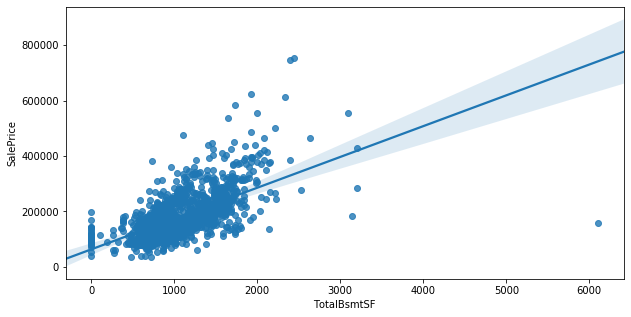

In [15]:
plt.figure(figsize=(10,5))
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=trainSet)

#### 1stFlrSF: Tamanho do primeiro andar 

À medida que o "1stFlrSF" aumenta, o preço da casa aumenta também.

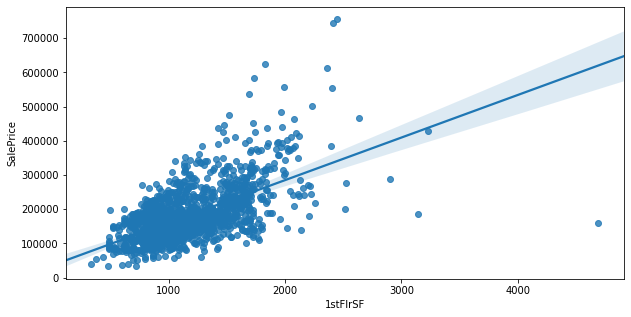

In [16]:
plt.figure(figsize=(10,5))
sns.regplot(x="1stFlrSF", y="SalePrice", data=trainSet)

#### FullBath: Quantidade de banheiros completos acima do solo (desconsiderando o porão)

À medida que o "FullBath" aumenta, o preço da casa aumenta também.

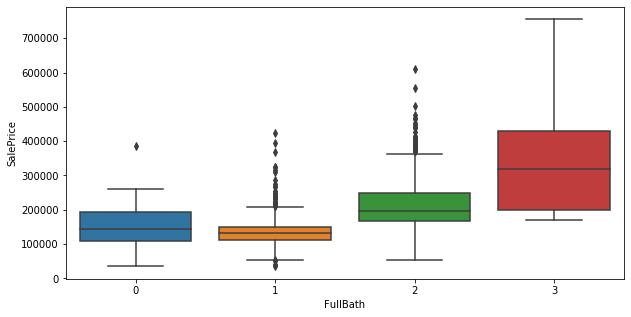

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x="FullBath", y="SalePrice", data=trainSet)

#### TotRmsAbvGrd: Quantidade de quartos acima do solo (não inclui banheiros)

À medida que o "TotRmsAbvGrd" aumenta, o preço da casa aumenta também.

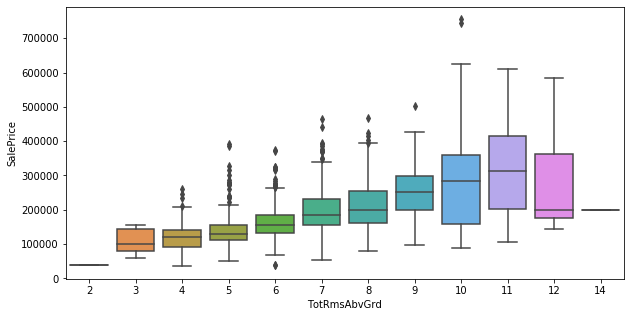

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x="TotRmsAbvGrd", y="SalePrice", data=trainSet)

#### YearBuilt: Data original da construção

Casa mais novas costumam ser mais caras

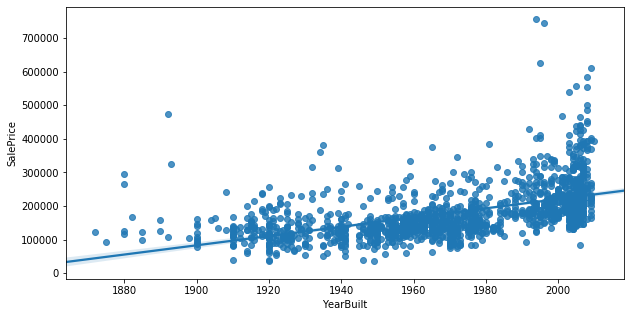

In [19]:
plt.figure(figsize=(10,5))
sns.regplot(x="YearBuilt", y="SalePrice", data=trainSet)

# Dados Nulos

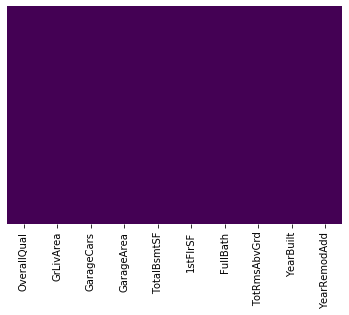

In [20]:
sns.heatmap(trainSet[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']].isnull(),yticklabels=False,cbar=False,cmap='viridis')

Os dados de teste não possuem valores nulos, mas os dados de teste podem ter, então os valores nulos vão ser substituidos pela média da variável

In [21]:
trainSet.fillna(trainSet.mean(), inplace=True)
testSet.fillna(testSet.mean(), inplace=True)

# Modelos

In [22]:
X_train = trainSet[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']]
Y_train = trainSet[["SalePrice"]]
X_test  = testSet[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']]
X_train.shape, Y_train.shape, X_test.shape

((1460, 10), (1460, 1), (1459, 10))

## Regressão Linear

In [54]:
regr = linear_model.LinearRegression()
regr.fit (np.asanyarray(X_train), np.asanyarray(Y_train))

y_pred1 = regr.predict(X_test)

acc_log = round(regr.score(X_train, Y_train) * 100, 2)
acc_log

print(acc_log)
print('Variance score: %.2f' % regr.score(X_train, Y_train))

77.37
Variance score: 0.77


In [28]:
testSet['SalePrice'] = y_pred1
testSet[['Id','SalePrice']].to_csv('submission_LinearRegression.csv',index=False)

# Regression based on k-nearest neighbors

In [53]:
model2 = KNeighborsRegressor(n_neighbors=2)
model2.fit(X_train, Y_train)

y_pred = model2.predict(X_test)

acc_log = round(model2.score(X_train, Y_train) * 100, 2)
acc_log

print(acc_log)

print('Variance score: %.2f' % model2.score(X_train, Y_train))

90.63
Variance score: 0.91


In [29]:
testSet['SalePrice'] = y_pred
testSet[['Id','SalePrice']].to_csv('submission_KNeighborsRegressor.csv',index=False)

In [55]:
model3 = KNeighborsRegressor(n_neighbors=3, weights= 'distance')
model3.fit(X_train, Y_train)

y_pred2 = model3.predict(X_test)

acc_log = round(model3.score(X_train, Y_train) * 100, 2)
acc_log
print(acc_log)

print('Variance score: %.2f' % model3.score(X_train, Y_train))

99.99
Variance score: 1.00


In [56]:
testSet['SalePrice'] = y_pred2
testSet[['Id','SalePrice']].to_csv('submission_KNeighborsRegressor2.csv',index=False)

In [59]:
model4 = KNeighborsRegressor(n_neighbors=3, weights= 'distance', n_jobs = 3)
model4.fit(X_train, Y_train)

y_pred3 = model4.predict(X_test)

acc_log = round(model4.score(X_train, Y_train) * 100, 2)
print(acc_log)

print('Variance score: %.2f' % model4.score(X_train, Y_train))


99.99
Variance score: 1.00


In [60]:
testSet['SalePrice'] = y_pred3
testSet[['Id','SalePrice']].to_csv('submission_KNeighborsRegressor3.csv',index=False)